<a href="https://colab.research.google.com/github/Zeeshan-jamal/cse445_final_assignment/blob/main/Copy_of_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Assignment on Heart Disease detection**

## Name: Zeeshan Jamal
## ID: 1731699642

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import of all the required libraries

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import figure
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re
%matplotlib inline
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


#### a)  Read the dataset using panda's dataframe.


In [ ]:
# df = pd.read_csv('heart.csv')
df = pd.read_csv('/content/drive/MyDrive/11th semester/cse445/final assignment/heart.csv')

#### b) Find out the number of instances and the number of features (including the target class) in the dataset.

In [ ]:
df.shape

(303, 14)

#### c) Show the first five rows of the *dataset*

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### d) Print the number of missing entries (i.e. the number of null values) per feature. If there exists any missing entries, replace the value with that particular feature's mean

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.isin(['	?']).sum() #data which includes the '?' sign

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.isin([' ']).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### e) Print the number of unique values per feature. If the number of unique values for any feature is less than 10, print those unique feature values.

In [ ]:
for column in df:
  unique_vals=np.unique(df[column])
  n_unique_vals=len(unique_vals)
  if(n_unique_vals<10):
    print('The number of unique values for feature {}: {} --{}'.format(column, n_unique_vals,unique_vals))
  else:
    print('The number of unique values for feature {}: {}'.format(column, n_unique_vals))


The number of unique values for feature age: 41
The number of unique values for feature sex: 2 --[0 1]
The number of unique values for feature cp: 4 --[0 1 2 3]
The number of unique values for feature trestbps: 49
The number of unique values for feature chol: 152
The number of unique values for feature fbs: 2 --[0 1]
The number of unique values for feature restecg: 3 --[0 1 2]
The number of unique values for feature thalach: 91
The number of unique values for feature exang: 2 --[0 1]
The number of unique values for feature oldpeak: 40
The number of unique values for feature slope: 3 --[0 1 2]
The number of unique values for feature ca: 5 --[0 1 2 3 4]
The number of unique values for feature thal: 4 --[0 1 2 3]
The number of unique values for feature target: 2 --[0 1]


#### f) Generate a boxplot that shows the gender-wise age distribution. Show the boxplot for target = 0 as well as target = 1. The following is the boxplot you will get

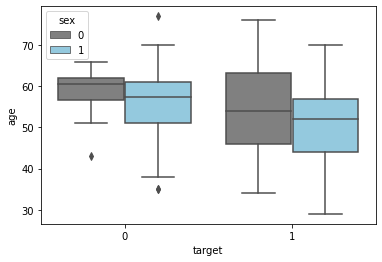

In [ ]:
pal=['grey','skyblue']
g=sns.boxplot(x='target',y='age',data=df,hue='sex',palette=pal)

#### g) Now, generate a boxplot that shows the chestpain-wise age distribution. Show the boxplot for target = 0 as well as target = 1

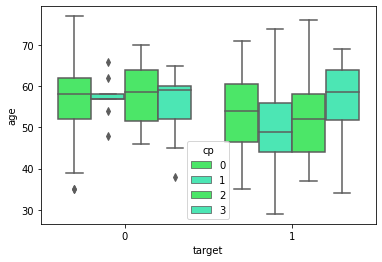

In [ ]:
pal=['#33FF57','#33FFBD']
g=sns.boxplot(x='target',y='age',data=df,hue='cp',palette=pal)

#### h) Generate lmplot to show how cholestoral varies with age. Draw separate lmplots for different gender. 5 marks


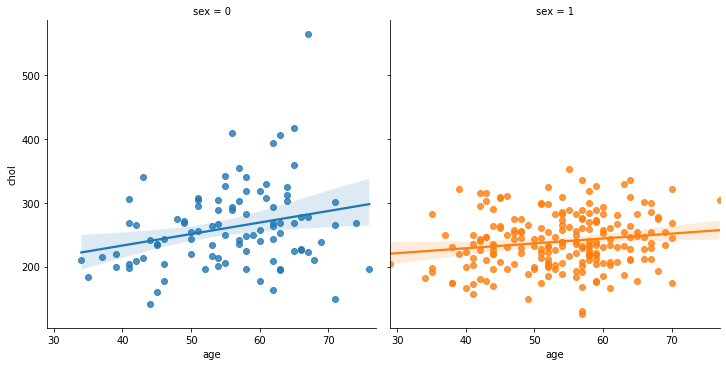

In [ ]:
g=sns.lmplot(x='age',y='chol',hue='sex',col='sex',data=df)

#### i) Generate a heatmap showing correlation between all features 3 marks

In [ ]:
X=df.drop(columns=['target'])
X
y=df['target']

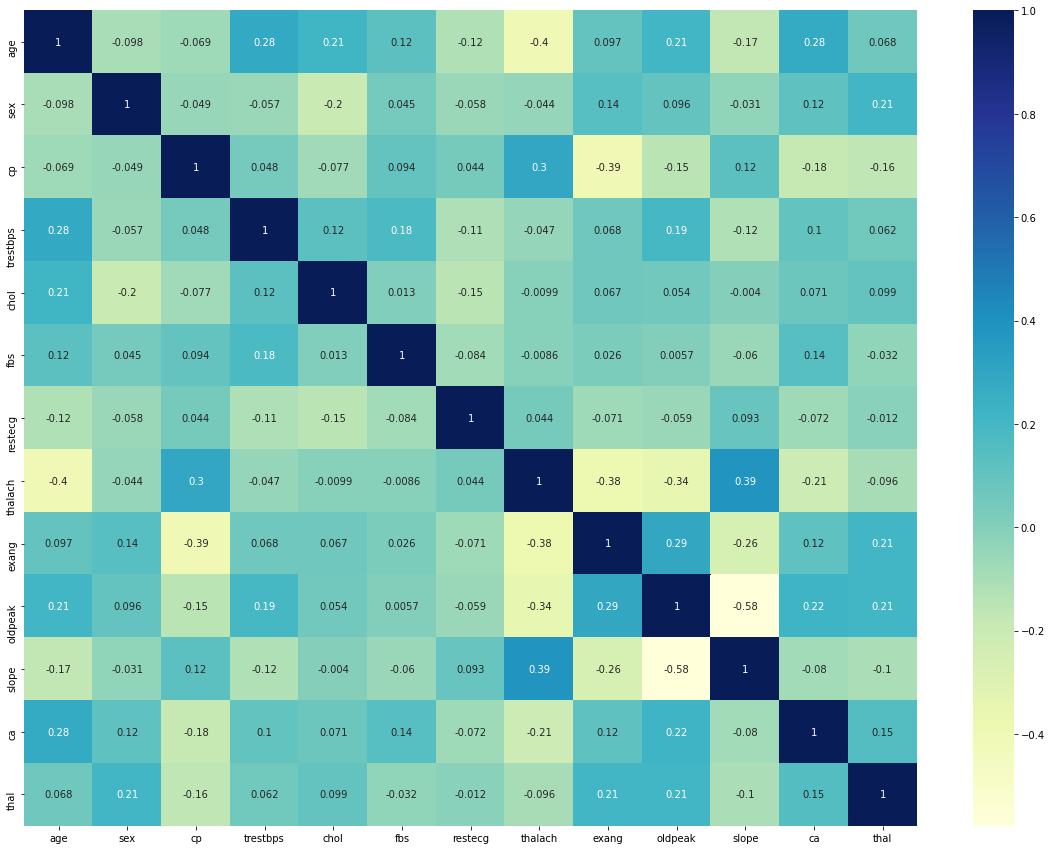

In [ ]:

plt.figure(figsize=(20,15))
sns.heatmap(X.corr(),cmap='YlGnBu',annot=True)
plt.show()

#### j) Scale all the features between 0 and 1 5 marks


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
print(X)
print("After scaling")
print(X_scaled)


     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]
After scaling
[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         

#### k) You are going to predict the “target”. Use 10 fold cross-validation to predict the target. Use the classifiers ZeroR, KNN, SVM, logistic regression and Decision Tree and for each of them, report the accuracy, precision, recall, roc area and f1 score along with the standard deviation of each of them

### Function that generates the Accuracy, precision, recall and ROC AUC area of each classifiers

In [ ]:

from numpy import mean, std
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
def models(X_train,y_train,scoring,cv):
  scoresZR = cross_val_score(DummyClassifier(strategy='most_frequent'), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
  print(scoring,'  for  Zero R Model: %.3f (%.3f)' % (mean(scoresZR), std(scoresZR)))
  scoresKNN = cross_val_score(KNeighborsClassifier(), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
  print(scoring,' for KNN Model: %.3f (%.3f)' % (mean(scoresKNN), std(scoresKNN)))
  scoresSV = cross_val_score(SVC(), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
  print(scoring,' for SVM Model: %.3f (%.3f)' % (mean(scoresSV), std(scoresSV)))
  scoresLR = cross_val_score(LogisticRegression(),X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
  print(scoring,' for Logistic Regression Model: %.3f (%.3f)' % (mean(scoresLR), std(scoresLR)))
  scoresDTREE = cross_val_score(DecisionTreeClassifier(), X_train, y_train, scoring = scoring, cv = cv, n_jobs = 1)
  print(scoring,' for Decision tree Model: %.3f (%.3f)' % (mean(scoresDTREE), std(scoresDTREE)))

### **Train and test splitting**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=1)

###zero R


In [ ]:
from sklearn.dummy import DummyClassifier
zeroR=DummyClassifier(strategy='most_frequent',random_state=0)
zeroR=zeroR.fit(X_train,y_train)
score_zeroR=zeroR.score(X_test,y_test)
pred_zeroR=zeroR.predict(X_test)
classification_report_zeroR=classification_report(y_test,pred_zeroR)
confusion_matrix_zeroR=confusion_matrix(y_test,pred_zeroR)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


####Accuracy Score

In [ ]:
print("Accuracy Score of ZeroR",score_zeroR)

Accuracy Score of ZeroR 0.5081967213114754


####Confusion matrix

In [ ]:
print("Confusion matrix\n",confusion_matrix_zeroR)

Confusion matrix
 [[ 0 30]
 [ 0 31]]


####Classification Report

In [ ]:
print("Classification report\n",classification_report_zeroR)

Classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.51      1.00      0.67        31

    accuracy                           0.51        61
   macro avg       0.25      0.50      0.34        61
weighted avg       0.26      0.51      0.34        61



###KNN

In [ ]:
knn=KNeighborsClassifier(metric='euclidean')
knn=knn.fit(X_train,y_train)
score_knn=knn.score(X_test,y_test)
pred_knn=knn.predict(X_test)
classification_report_knn=classification_report(y_test,pred_knn)
confusion_matrix_knn=confusion_matrix(y_test,pred_knn)

####Accuracy Score

In [ ]:
print("Accuracy Score of knn", score_knn)

Accuracy Score of knn 0.7540983606557377


####Confusion matrix

In [ ]:
print("Confusion matrix\n",confusion_matrix_knn)

Confusion matrix
 [[23  7]
 [ 8 23]]


####Classification Report

In [ ]:
print("Classification report\n",classification_report_knn)

Classification report
               precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.77      0.74      0.75        31

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



###SVM

In [ ]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)
score_svm=svm.score(X_test, y_test)
pred_svm=svm.predict(X_test)
classification_report_svm=classification_report(y_test,pred_svm)
confusion_matrix_svm=confusion_matrix(y_test,pred_svm)

#### Accuracy Score

In [ ]:
print("Accuracy Score of svm", score_svm)

Accuracy Score of svm 0.7213114754098361


#### Confusion matrix

In [ ]:
print("Confusion matrix\n",confusion_matrix_svm)

Confusion matrix
 [[21  9]
 [ 8 23]]


####Classification Report

In [ ]:
print("Classification report\n",classification_report_svm)

Classification report
               precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.72      0.74      0.73        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



### Logistic Regression

In [ ]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
score_lr=lr.score(X_test, y_test)
pred_lr=lr.predict(X_test)
classification_report_lr=classification_report(y_test,pred_lr)
confusion_matrix_lr=confusion_matrix(y_test,pred_lr)

#### Accuracy Score

In [ ]:
print("Accuracy Score of lr", score_lr)

Accuracy Score of lr 0.7540983606557377


#### Confusion matrix

In [ ]:
print("Confusion matrix\n",confusion_matrix_lr)

Confusion matrix
 [[20 10]
 [ 5 26]]


####Classification Report

In [ ]:
print("Classification report\n",classification_report_lr)

Classification report
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



### Decision Tree

In [ ]:
dtree=tree.DecisionTreeClassifier()
dtree=dtree.fit(X_train,y_train)
score_dtree= dtree.score(X_test,y_test)
pred_dtree=dtree.predict(X_test)
classification_report_dtree=classification_report(y_test,pred_dtree)
confusion_matrix_dtree=confusion_matrix(y_test,pred_dtree)

#### Accuracy Score

In [ ]:
print("Accuracy Score of dtree", score_dtree)

Accuracy Score of dtree 0.6885245901639344


#### Confusion matrix

In [ ]:
print("Confusion matrix\n",confusion_matrix_dtree)

Confusion matrix
 [[19 11]
 [ 8 23]]


####Classification Report

In [ ]:
print("Classification report\n",classification_report_dtree)

Classification report
               precision    recall  f1-score   support

           0       0.70      0.63      0.67        30
           1       0.68      0.74      0.71        31

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



###K Fold Cross Validation

In [ ]:
print('\nAccuracy\n')
models(X_train,y_train,'accuracy',cv)
print('\nPrecision\n')
models(X_train,y_train,'precision',cv)
print('\nRecall\n')
models(X_train,y_train,'recall',cv)
print('\nF-measure\n')
models(X_train,y_train,'f1',cv)
print('\nROC\n')
models(X_train,y_train,'roc_auc',cv)



Accuracy

accuracy   for  Zero R Model: 0.554 (0.016)
accuracy  for KNN Model: 0.822 (0.043)
accuracy  for SVM Model: 0.838 (0.055)
accuracy  for Logistic Regression Model: 0.826 (0.059)
accuracy  for Decision tree Model: 0.780 (0.075)

Precision

precision   for  Zero R Model: 0.554 (0.016)
precision  for KNN Model: 0.836 (0.078)
precision  for SVM Model: 0.831 (0.069)
precision  for Logistic Regression Model: 0.816 (0.046)
precision  for Decision tree Model: 0.783 (0.033)

Recall

recall   for  Zero R Model: 1.000 (0.000)
recall  for KNN Model: 0.858 (0.063)
recall  for SVM Model: 0.903 (0.083)
recall  for Logistic Regression Model: 0.888 (0.103)
recall  for Decision tree Model: 0.859 (0.082)

F-measure

f1   for  Zero R Model: 0.713 (0.013)
f1  for KNN Model: 0.842 (0.036)
f1  for SVM Model: 0.861 (0.046)
f1  for Logistic Regression Model: 0.847 (0.058)
f1  for Decision tree Model: 0.816 (0.057)

ROC

roc_auc   for  Zero R Model: 0.500 (0.000)
roc_auc  for KNN Model: 0.892 (0.030)


### ROC AUC Curve

zeroR: ROC AUC=0.500
Logistic Regression: ROC AUC=0.848
dtree: ROC AUC=0.688
knn: ROC AUC=0.763
svm: ROC AUC=0.832


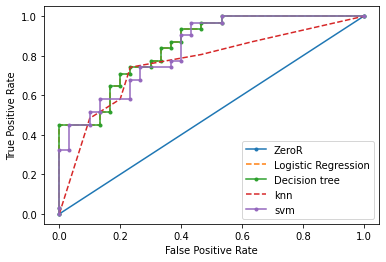

In [ ]:

zr_probs=zeroR.predict_proba(X_test)
zr_probs=zr_probs[:,1]
zr_auc = roc_auc_score(y_test, zr_probs)

print('zeroR: ROC AUC=%.3f' % (zr_auc))

zr_fpr, zr_tpr, _ = roc_curve(y_test, zr_probs)
plt.plot(zr_fpr, zr_tpr, marker='.', label='ZeroR')






lr_probs=lr.predict_proba(X_test)
lr_probs=lr_probs[:,1]
lr_auc = roc_auc_score(y_test, lr_probs)

print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression')






dtree_probs=dtree.predict_proba(X_test)
dtree_probs=dtree_probs[:,1]
dtree_auc = roc_auc_score(y_test, dtree_probs)

print('dtree: ROC AUC=%.3f' % (dtree_auc))

dtree_fpr, dtree_tpr, _ =  roc_curve(y_test, lr_probs)

plt.plot(dtree_fpr, dtree_tpr, marker='.', label='Decision tree')



knn_probs=knn.predict_proba(X_test)
knn_probs=knn_probs[:,1]
knn_auc = roc_auc_score(y_test, knn_probs)

print('knn: ROC AUC=%.3f' % (knn_auc))

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='knn')






svm_probs=svm.predict_proba(X_test)
svm_probs=svm_probs[:,1]
svm_auc = roc_auc_score(y_test, svm_probs)

print('svm: ROC AUC=%.3f' % (svm_auc))

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
plt.plot(svm_fpr, svm_tpr, marker='.', label='svm')





# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()